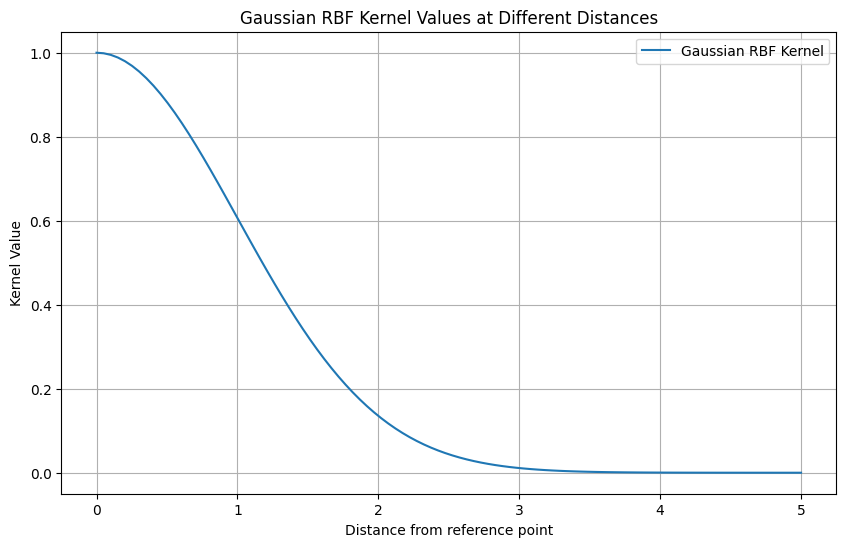

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_rbf_kernel(x1, x2, sigma=1):
    """
    Calculate the Gaussian RBF kernel between two points.
    
    Args:
    - x1, x2: Numpy arrays representing the two points.
    - sigma: The sigma parameter of the Gaussian RBF kernel.
    
    Returns:
    - The kernel value.
    """
    return np.exp(-np.linalg.norm(x1 - x2)**2 / (2 * sigma**2))

# Reference point
x = np.array([0, 0])

# Array of points at different distances from the reference point along the x-axis
distances = np.linspace(0, 5, 100)
points = np.array([[d, 0] for d in distances])

# Calculate the kernel values for these points
kernel_values = [gaussian_rbf_kernel(x, point) for point in points]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(distances, kernel_values, label='Gaussian RBF Kernel')
plt.xlabel('Distance from reference point')
plt.ylabel('Kernel Value')
plt.title('Gaussian RBF Kernel Values at Different Distances')
plt.legend()
plt.grid(True)
plt.show()


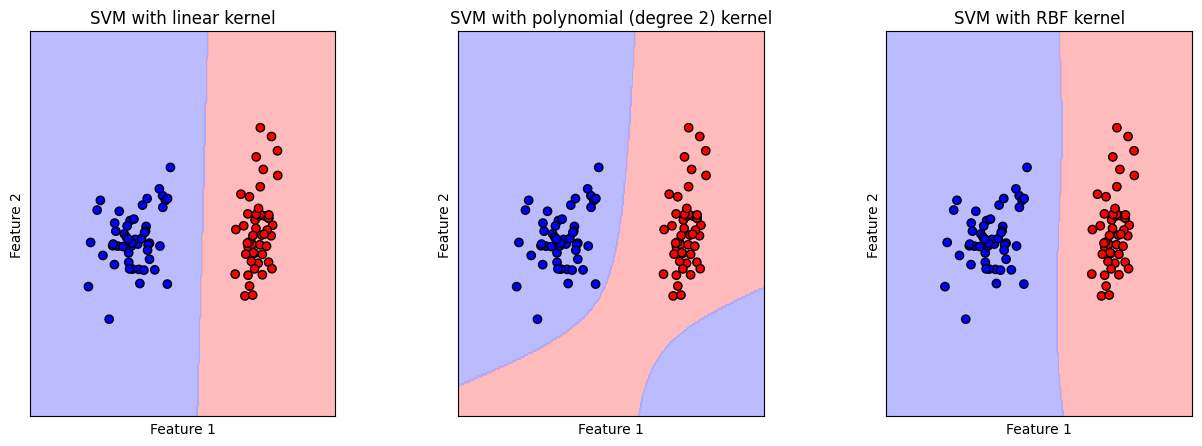

In [6]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Create a synthetic dataset
X, y = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1, n_classes=2)

# Define the SVM models with different kernels
models = (svm.SVC(kernel='linear', C=1.0),
          svm.SVC(kernel='poly', degree=2, C=1.0),
          svm.SVC(kernel='rbf', gamma='scale', C=1.0))

models = (clf.fit(X, y) for clf in models)

# Title for the plots
titles = ('SVM with linear kernel',
          'SVM with polynomial (degree 2) kernel',
          'SVM with RBF kernel')

# Set-up 2x2 grid for plotting
fig, sub = plt.subplots(1, 3, figsize=(15, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = np.meshgrid(np.arange(X0.min() - 1, X0.max() + 1, 0.02),
                     np.arange(X1.min() - 1, X1.max() + 1, 0.02))

# Plot decision boundaries and support vectors
for clf, title, ax in zip(models, titles, sub.flatten()):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    ax.scatter(X0, X1, c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()


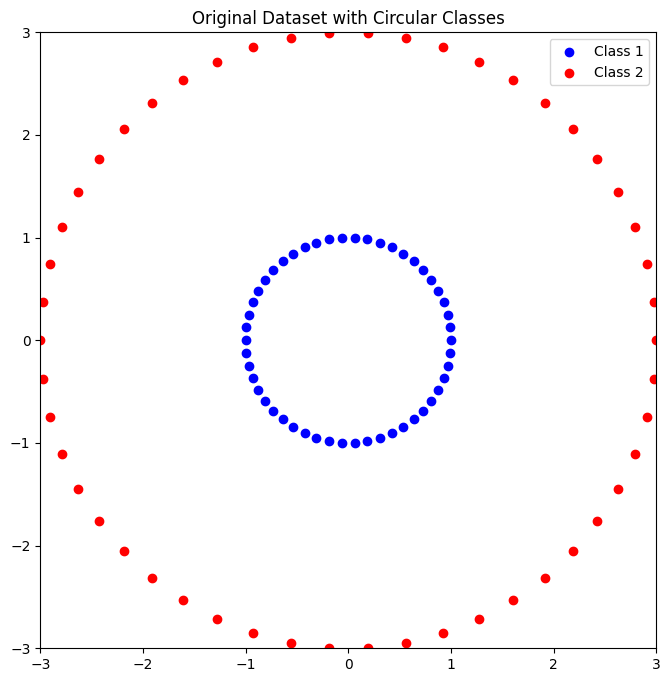

In [7]:
# Import necessary libraries
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Define the function to create circular data points
def create_circular_data(radius, num_points):
    """
    This function generates `num_points` data points on a circle of given `radius`.
    """
    return [(np.cos(2*np.pi/num_points*i)*radius, np.sin(2*np.pi/num_points*i)*radius) for i in range(num_points)]

# Number of points per class
num_points = 50

# Generate circular data points for both classes
inner_circle = create_circular_data(radius=1, num_points=num_points)
outer_circle = create_circular_data(radius=3, num_points=num_points)

# Combine the data points
X = np.vstack((inner_circle, outer_circle))
y = np.array([0] * num_points + [1] * num_points)

# Plot the original dataset
plt.figure(figsize=(8, 8))
plt.scatter(X[:num_points, 0], X[:num_points, 1], color='blue', label='Class 1')
plt.scatter(X[num_points:, 0], X[num_points:, 1], color='red', label='Class 2')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Original Dataset with Circular Classes')
plt.legend()
plt.show()


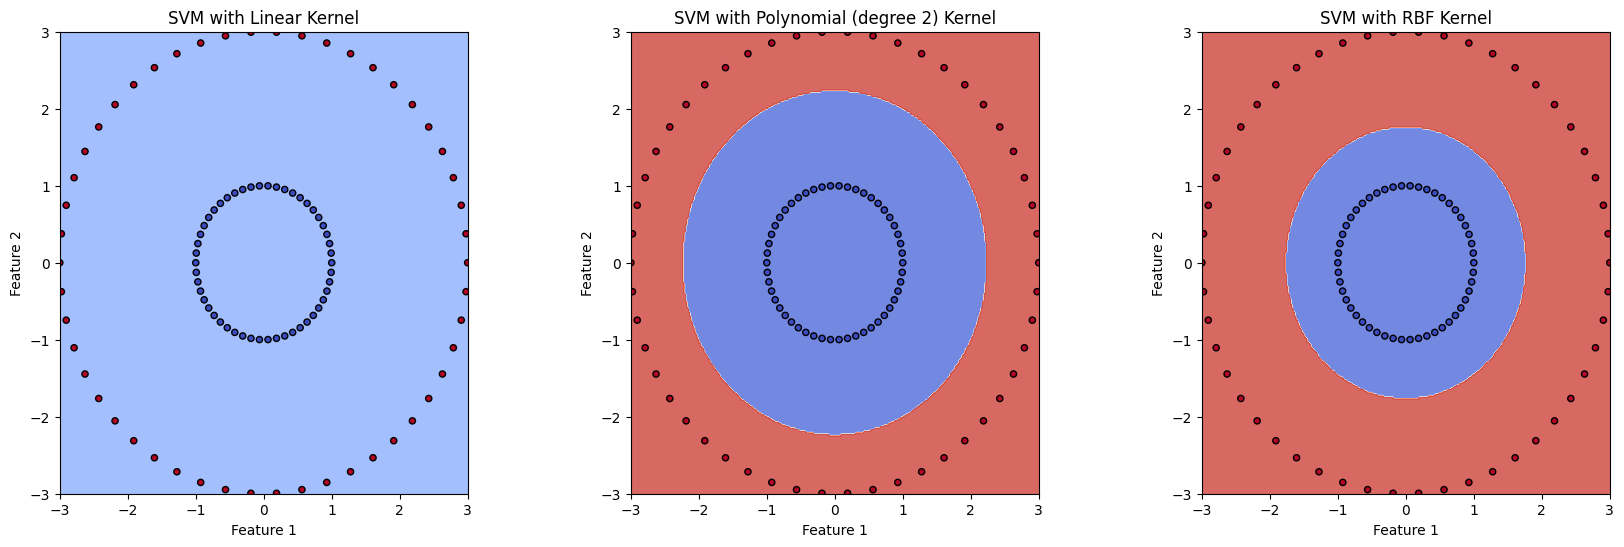

In [8]:
# Function to plot decision boundaries
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Set-up 2x2 grid for plotting
fig, sub = plt.subplots(1, 3, figsize=(20, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Define the SVM models with different kernels
models = (SVC(kernel='linear', C=1.0),
          SVC(kernel='poly', degree=2, C=1.0),
          SVC(kernel='rbf', gamma='auto', C=1.0))

models = (model.fit(X, y) for model in models)

titles = ('SVM with Linear Kernel',
          'SVM with Polynomial (degree 2) Kernel',
          'SVM with RBF Kernel')

# Set-up meshgrid
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.show()


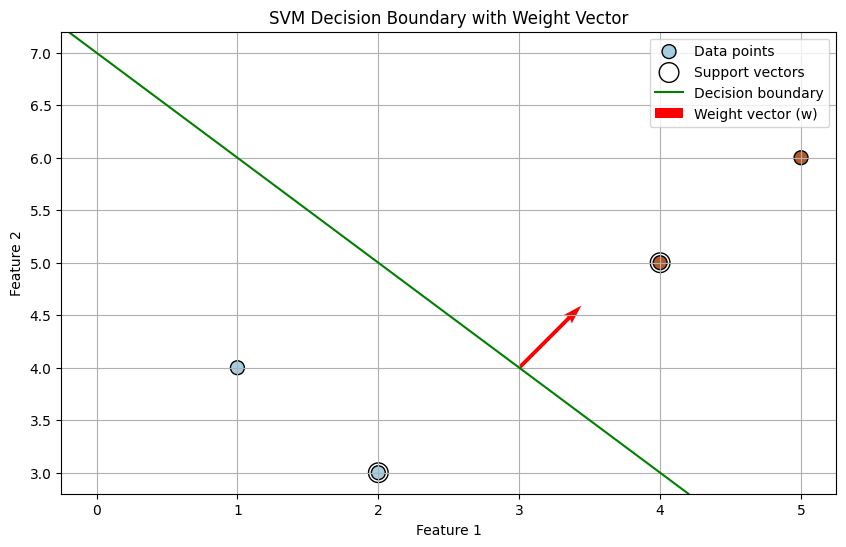

('Decision function: 0.50x1 + 0.50x2 + -3.50 = 0',
 array([0.5, 0.5]),
 -3.5,
 array([[2., 3.],
        [4., 5.]]))

In [9]:
# Define the coordinates for the two classes
X = np.array([[1, 4], [2, 3], [4, 5], [5, 6]])  # Feature set
y = np.array([-1, -1, 1, 1])  # Labels

# Train the SVM with a linear kernel and a large C value
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

# Get the weight vector (w) and the bias (b) from the trained model
w = clf.coef_[0]
b = clf.intercept_[0]

# Support vectors
support_vectors = clf.support_vectors_

# Plot the decision boundary, margins, and support vectors
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=100, edgecolors='k', label='Data points')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none', edgecolors='k', label='Support vectors')
plt.axline((0, -b / w[1]), slope=-w[0] / w[1], color='green', label='Decision boundary')

# Weight vector
weight_vector_start = np.mean(support_vectors, axis=0)
plt.quiver(*weight_vector_start, *w, scale=1, scale_units='xy', width=0.005, color='red', label='Weight vector (w)')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Weight Vector')
plt.legend()
plt.grid(True)
plt.show()

# Display the decision function equation
decision_function = f"Decision function: {w[0]:.2f}x1 + {w[1]:.2f}x2 + {b:.2f} = 0"
decision_function, w, b, support_vectors


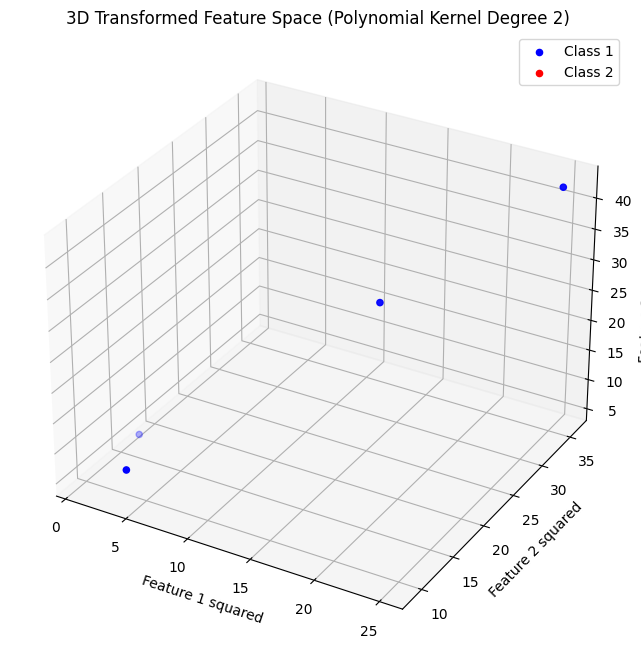

In [10]:
# Transform the features to a new space as a polynomial kernel of degree 2 would
# New features will be x1^2, x2^2, and x1*x2

# Function to apply polynomial transformation
def polynomial_transform(X, degree=2):
    if degree == 2:
        # For each point (x1, x2), create a new point (x1^2, x2^2, sqrt(2)*x1*x2)
        X_transformed = np.array([[x1**2, x2**2, np.sqrt(2)*x1*x2] for x1, x2 in X])
    else:
        # If not degree 2, return the original features (this is just a placeholder)
        X_transformed = X
    return X_transformed

# Apply the transformation
X_transformed = polynomial_transform(X)

# Plot the new feature space
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the original points in the transformed feature space
ax.scatter(X_transformed[:num_points, 0], X_transformed[:num_points, 1], X_transformed[:num_points, 2], color='blue', label='Class 1')
ax.scatter(X_transformed[num_points:, 0], X_transformed[num_points:, 1], X_transformed[num_points:, 2], color='red', label='Class 2')

ax.set_xlabel('Feature 1 squared')
ax.set_ylabel('Feature 2 squared')
ax.set_zlabel('Feature 1 * Feature 2')
ax.set_title('3D Transformed Feature Space (Polynomial Kernel Degree 2)')

# Show legend and plot
ax.legend()
plt.show()
